# Grid Detection

In [1]:
from pathlib import Path

In [2]:
import random

def choose_random_jpg(data_path):
    jpg_files = list(data_path.rglob('*.jpg'))
    if not jpg_files:
        return None
    return random.choice(jpg_files)

random_jpg = choose_random_jpg(Path("../data/sudoku_dataset"))
print(random_jpg)

..\data\sudoku_dataset\mixed 2\mixed 2\image139.jpg


In [3]:
import cv2

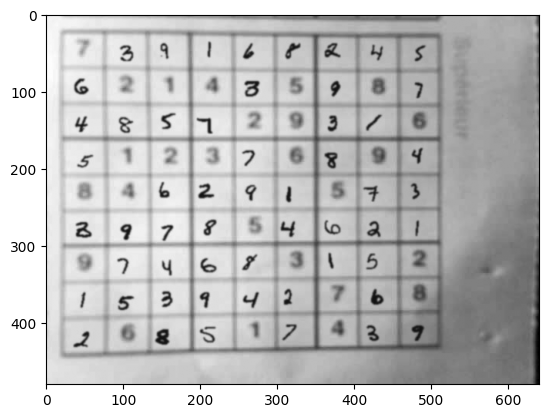

In [4]:
# load and convert to grayscale
image = cv2.imread(str(random_jpg))
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

import cv2
import matplotlib.pyplot as plt
plt.imshow(gray_img, cmap='gray')
plt.show()

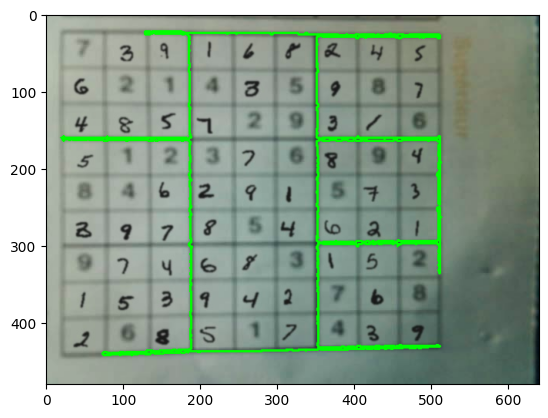

In [5]:
# apply adaptive thresholding
binary = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5
)
# _, binary = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# show contours on the original image with green color and thickness of 2
# contour_img = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# fidn the largest contour (assumed to be the Sudoku grid)
largest_contour = max(contours, key=cv2.contourArea)

# show the largest contour
contour_img = cv2.drawContours(image.copy(), [largest_contour], -1, (0, 255, 0), 2)

plt.imshow(contour_img)

In [6]:
def fragment_grid(image):
    cell_height, cell_width = image.shape[0] // 9, image.shape[1] // 9
    cells = []
    for i in range(9):
        row = []
        for j in range(9):
            x, y = j * cell_width, i * cell_height
            cell = image[y:y + cell_height, x:x + cell_width]
            row.append(cell)
        cells.append(row)
    return cells

In [7]:
import numpy as np

In [8]:
def plot_original_and_cells(original_image, cells):
    """Plot the original image and extracted cells side by side, with separated cell borders and green borders around each cell."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Create a blank canvas for the cells with spacing between them
    cell_height, cell_width = cells[0][0].shape
    spacing = 5  # Spacing between cells
    border_thickness = 2  # Thickness of the green border
    canvas_height = 9 * (cell_height + 2 * border_thickness) + 8 * spacing
    canvas_width = 9 * (cell_width + 2 * border_thickness) + 8 * spacing
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # White background

    for i in range(9):
        for j in range(9):
            y_start = i * (cell_height + 2 * border_thickness + spacing)
            y_end = y_start + cell_height + 2 * border_thickness
            x_start = j * (cell_width + 2 * border_thickness + spacing)
            x_end = x_start + cell_width + 2 * border_thickness

            # Draw the green border
            canvas[y_start:y_end, x_start:x_end] = [0, 255, 0]  # Green border

            # Place the cell inside the border
            canvas[y_start + border_thickness:y_end - border_thickness,
                   x_start + border_thickness:x_end - border_thickness] = cv2.cvtColor(cells[i][j], cv2.COLOR_GRAY2BGR)

    # Plot the separated cells
    axes[1].imshow(canvas)
    axes[1].set_title("Extracted Cells")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

In [9]:
x, y, w, h = cv2.boundingRect(largest_contour)
# warp the image to better fit the grid
pts1 = np.float32([[x, y], [x + w, y], [x, y + h], [x + w, y + h]])
# standard size
pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(binary, matrix, (450, 450))

cells = fragment_grid(warped)

cells[0][0].shape

(50, 50)

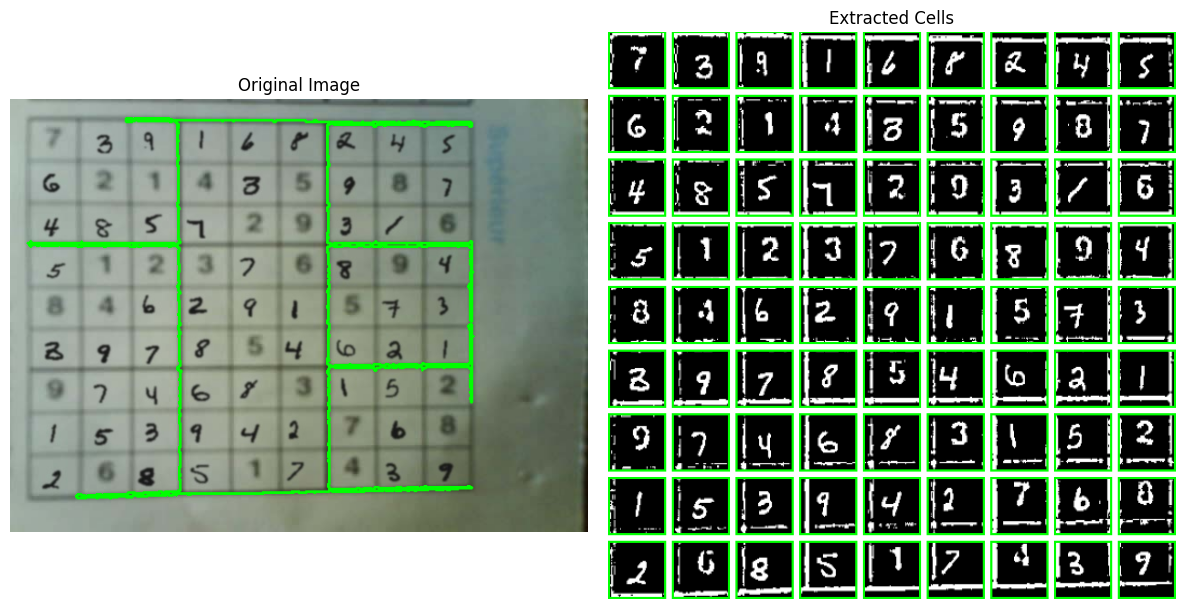

In [10]:
plot_original_and_cells(contour_img, cells)

In [11]:
import random

def choose_random_jpg(data_path):
    jpg_files = list(data_path.rglob('*.jpg'))
    if not jpg_files:
        return None
    return random.choice(jpg_files)

def find_largest_contour(image):
    image = cv2.imread(str(image))
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # apply adaptive thresholding
    binary = cv2.adaptiveThreshold(
        gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5
    )
    # _, binary = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # show contours on the original image with green color and thickness of 2
    # contour_img = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

    # fidn the largest contour (assumed to be the Sudoku grid)
    largest_contour = max(contours, key=cv2.contourArea)

    # show the largest contour
    contour_img = cv2.drawContours(image.copy(), [largest_contour], -1, (0, 255, 0), 2)
    return largest_contour, contour_img

def fragment_grid(image):
    cell_height, cell_width = image.shape[0] // 9, image.shape[1] // 9
    cells = []
    for i in range(9):
        row = []
        for j in range(9):
            x, y = j * cell_width, i * cell_height
            cell = image[y:y + cell_height, x:x + cell_width]
            row.append(cell)
        cells.append(row)
    return cells

def process_image(image):
    x, y, w, h = cv2.boundingRect(image)
    # warp the image to better fit the grid
    pts1 = np.float32([[x, y], [x + w, y], [x, y + h], [x + w, y + h]])
    # standard size
    pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    warped = cv2.warpPerspective(binary, matrix, (450, 450))
    cells = fragment_grid(warped)
    return cells

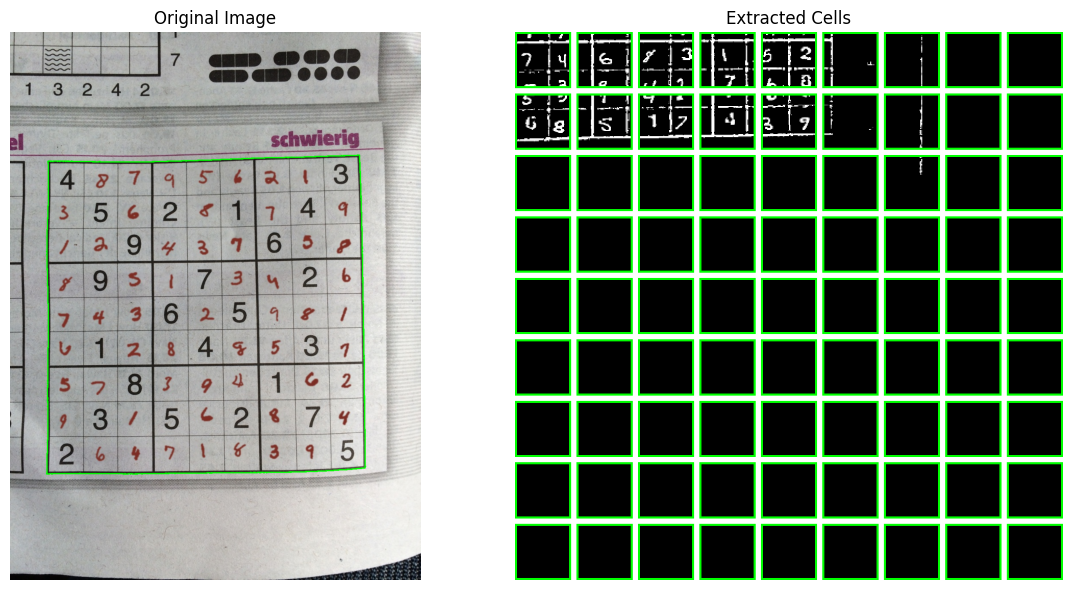

In [12]:
random_jpg = choose_random_jpg(Path("../data/sudoku_dataset"))
largest_contour, contour_img = find_largest_contour(random_jpg)
plot_original_and_cells(contour_img, process_image(largest_contour))